In [1]:
using Revise
using CMBLensing
using CMBLensing: jrk4
using PyPlot

In [2]:
rc("xtick",top=true,bottom=true,direction="in",labelsize=12)
rc("ytick",left=true,right=true,direction="in",labelsize=12)
rc("axes",labelsize=16,titlesize=16)
rc("legend",frameon=false,fontsize=12)
rc("figure",figsize=(6.4,4.8))

In [3]:
cls = class();

In [4]:
T=Float64
nside=512
P=Flat{1//8,nside}

CMBLensing.Flat{1//8,512}

In [5]:
Cf = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:tt])
# Cf = Cℓ_to_cov(T,P,S2,cls[:ℓ],cls[:ee],cls[:bb])
Cϕ = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:ϕϕ])

CMBLensing.FullDiagOp{CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}},CMBLensing.Flat{1//8,512},CMBLensing.S0,CMBLensing.Fourier}(CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}}(Complex{Float64}[0.0+0.0im 1.3469e-17+0.0im … 3.01489e-19+0.0im 1.3469e-17+0.0im; 1.3469e-17+0.0im 2.09333e-18+0.0im … 1.60169e-19+0.0im 2.09333e-18+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]))

In [6]:
srand(3)
f = simulate(Cf)
ϕ = simulate(Cϕ)
f2 = ud_grade(f,2)
ϕ2 = ud_grade(ϕ,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([3.41503e-7 3.45311e-7 … 2.97353e-7 3.24531e-7; 2.28454e-7 2.50543e-7 … 1.74014e-7 2.03136e-7; … ; 5.78924e-7 5.57113e-7 … 5.74715e-7 5.83005e-7; 4.59868e-7 4.50599e-7 … 4.32679e-7 4.52948e-7])

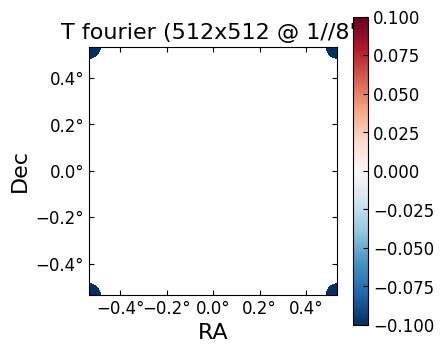

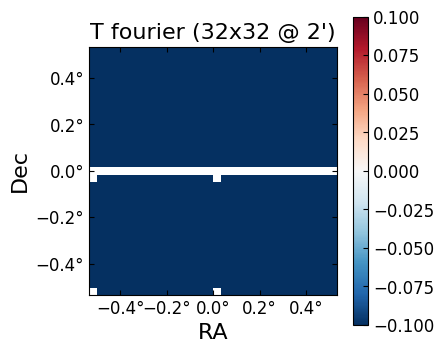

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f93041e5eb8>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f9304208cc0>])

In [9]:
plot(f,which=[:Tl])
plot(f2,which=[:Tl])

In [10]:
LF=LenseFlow{jrk4{14}}
PL=PowerLens{10}

CMBLensing.PowerLens{10,F} where F<:(CMBLensing.Field{#s60,#s59,B} where B<:CMBLensing.Basis where #s59<:CMBLensing.S0 where #s60)

In [11]:
truth = ud_grade(LF(ϕ)*f,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([-97.049 -96.4295 … -62.2393 -84.2653; -63.1716 -62.6634 … -33.1965 -53.7608; … ; -88.1848 -94.7628 … -37.6144 -63.6363; -102.462 -105.233 … -57.9056 -83.4203])

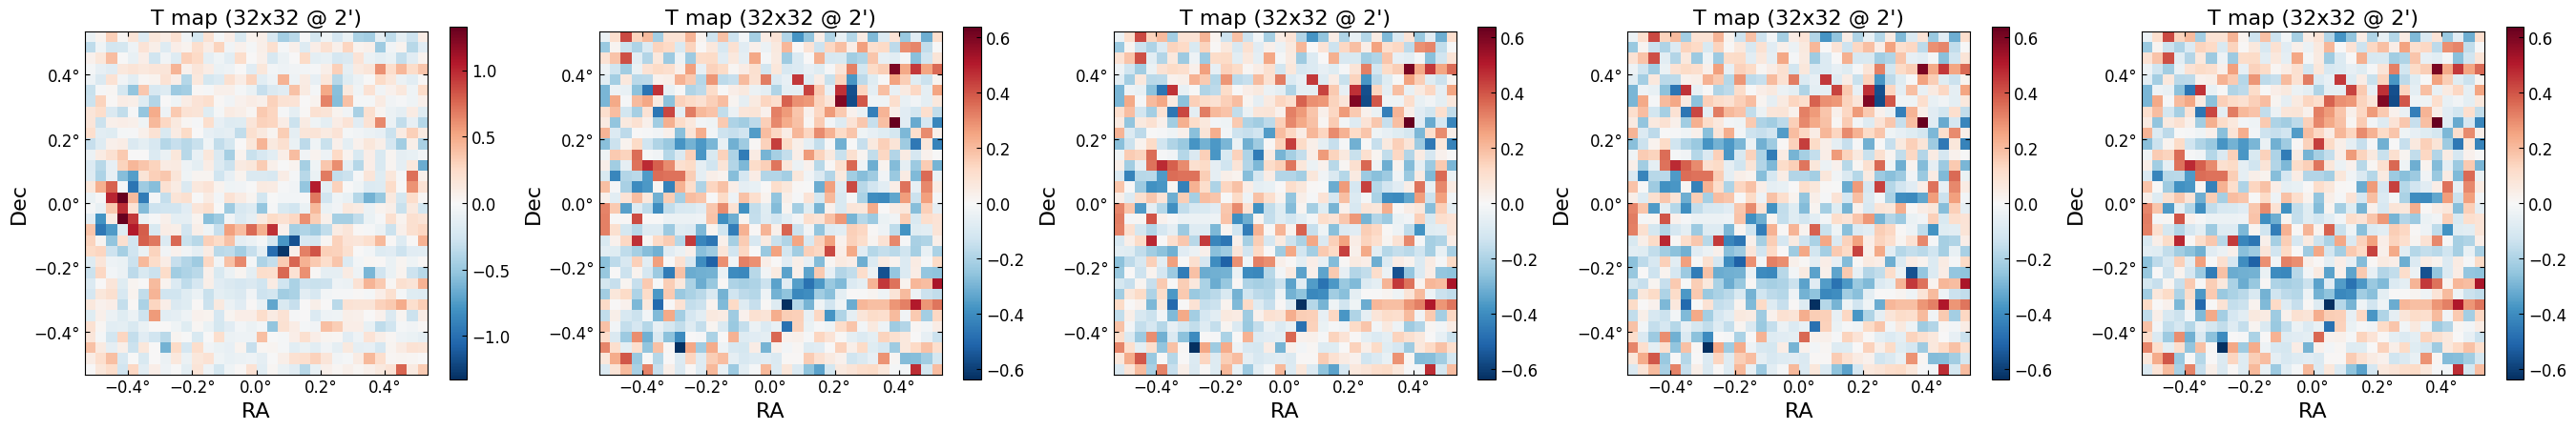

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f930c054c88>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f9304109358> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f9304082be0> … PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f92f83ca550> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f92f8393978>])

In [12]:
plot([PowerLens{i}(ϕ2)*f2-truth for i=[2,5,7,10,20]]')

In [21]:
dat = [1e6ϕ f LF(ϕ)*f-f;
LF(ϕ2)*f2-truth  PL(ϕ2)*f2-truth LF(ϕ2)*f2-PL(ϕ2)*f2];

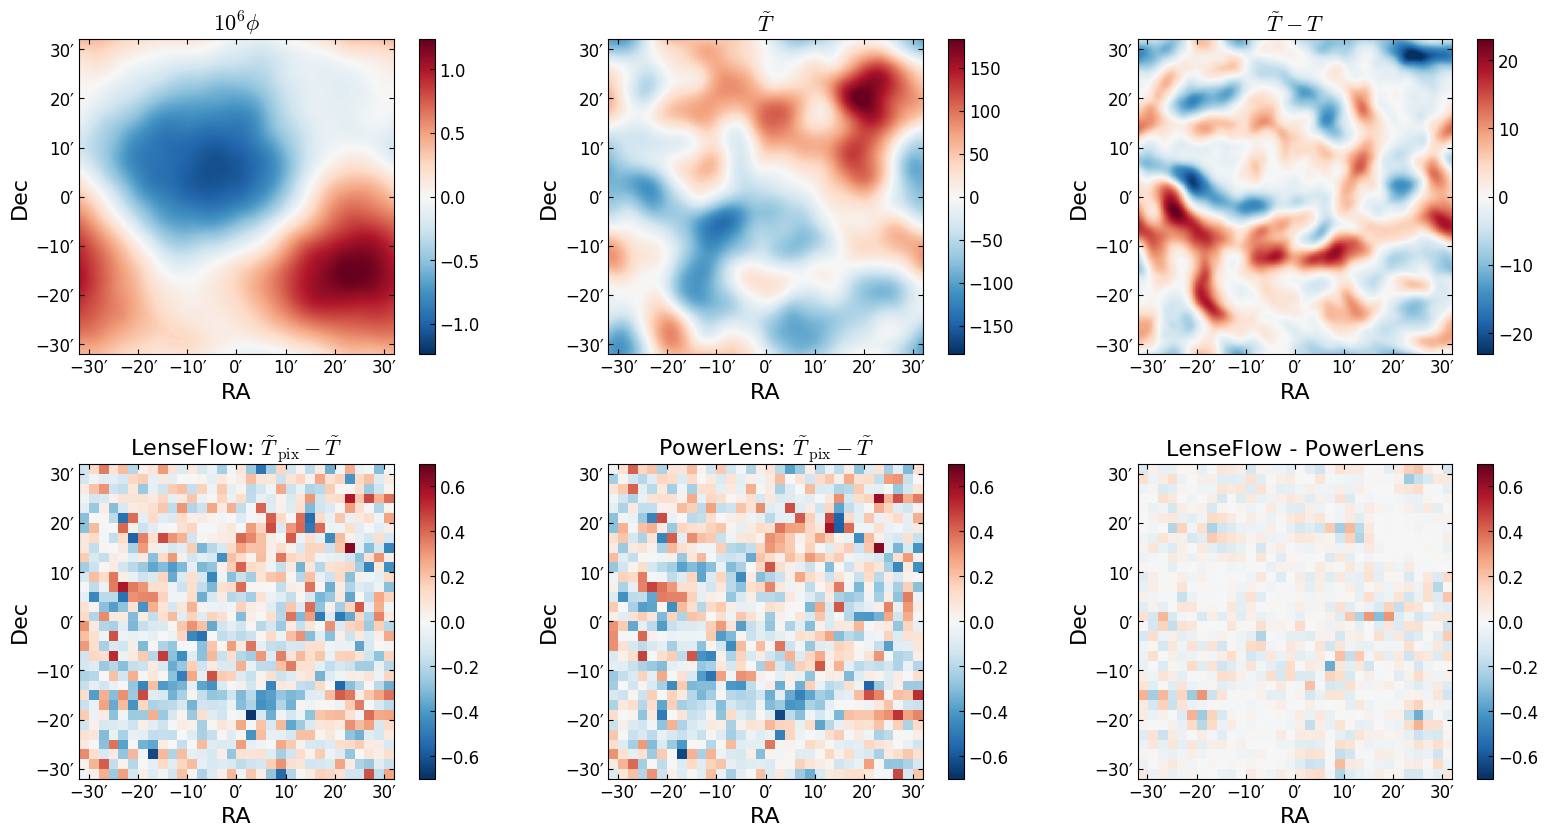

In [32]:
_,axs = plot(dat, units=:arcmin)
subplots_adjust(wspace=0.05, hspace=0.35)

axs[1,1][:set_title](raw"$10^6\phi$")
axs[1,2][:set_title](raw"$\tilde T$")
axs[1,3][:set_title](raw"$\tilde T - T$")
axs[2,1][:set_title](raw"LenseFlow: $\tilde T_{\rm pix} - \tilde T$")
axs[2,2][:set_title](raw"PowerLens: $\tilde T_{\rm pix} - \tilde T$")
axs[2,3][:set_title](raw"LenseFlow - PowerLens")

for i=1:3; axs[2,i][:get_children]()[end-1][:set_clim](-0.7,0.7); end


savefig("../paper/figs/lenseflow_pixlens.pdf",bbox_inches="tight")